Question - 1
Loading the Files

In [2]:
import numpy as np
import pandas as pd

import os
for dirname,_,filenames in os.walk("D:/college files/Master's/255/Assignments"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

Reading the CSV Files

In [3]:
df = pd.read_csv("used_cars_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


Transforming Mileage into a an new Column with single form of Data i.e float

In [6]:
import pandas as pd

data = pd.DataFrame({'mileage' : df['Mileage']})


def correct_mileage(mileage):
    if isinstance(mileage, float) and not pd.isna(mileage):
        return mileage
    elif isinstance(mileage, str):
        if mileage.endswith('km/kg'):
            mileage = mileage[:-6]  # Remove ' km/kg'
            mileage = float(mileage) * 1.40  # Convert to kmpl
        elif mileage.endswith('kmpl'):
            mileage = mileage[:-6]  # Remove ' kmpl'
        return float(mileage)
    else:
        return mileage
data ['New_mileage'] = data['mileage'].apply(correct_mileage)

print(data)

         mileage  New_mileage
0     26.6 km/kg        37.24
1     19.67 kmpl        19.60
2      18.2 kmpl        18.00
3     20.77 kmpl        20.70
4      15.2 kmpl        15.00
...          ...          ...
7248  20.54 kmpl        20.50
7249  17.21 kmpl        17.20
7250  23.08 kmpl        23.00
7251   17.2 kmpl        17.00
7252   10.0 kmpl        10.00

[7253 rows x 2 columns]


Assigning the Float data to original dataframe.

In [7]:
df['Mileage'] = data['New_mileage']
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,5.0,NaN,17.74


Transforming the "Engine" and "Power" Columns to float type of Data.

In [8]:
df = pd.read_csv("used_cars_data.csv")

x = []
for i in df.Engine:
    if str(i).endswith('CC'):
        i = i[:-3]
        x.append(float(i))
    
# Remove null values and attribute 'bhp', then convert to float
cleaned_power = []

for value in df.Power:
    if pd.isna(value) or value == 'null':
        cleaned_power.append(np.nan)
    else:
        # Split the string at the space and take the first part (the numeric value)
        numeric_value = value.split()[0]
        # Try to convert the numeric value to float, handle the case when 'null' is encountered
        try:
            float_value = float(numeric_value)
            cleaned_power.append(float_value)
        except ValueError:
            cleaned_power.append(np.nan)


# Output the result
print(cleaned_power)
print(x)

[58.16, 126.2, 88.7, 88.76, 140.8, 55.2, 63.1, 171.5, 103.6, 74.0, 103.25, 116.3, 74.0, 187.7, 115.0, 175.56, 98.6, 74.0, 83.8, 167.62, 190.0, 88.5, 177.01, 80.0, 103.6, 116.3, 63.1, 67.1, 88.7, 102.0, 108.45, 138.1, 184.0, 179.5, 103.5, 64.0, 88.5, 82.0, 254.8, 73.9, 46.3, 37.5, 77.0, 82.9, 149.92, 138.03, 112.2, 163.7, 71.0, 105.0, 174.33, 74.0, 75.0, 74.0, 82.0, 103.2, 53.3, 78.9, 147.6, 67.1, 147.8, 68.0, 186.0, 170.0, 69.0, 140.0, 78.0, 194.0, 88.5, 88.7, 500.0, 140.0, 78.9, 108.5, 86.8, 187.74, nan, 132.0, 102.0, nan, 74.0, 88.7, 86.7, 68.0, 73.94, 117.3, 218.0, 78.9, 82.0, nan, 86.7, 168.5, 174.33, 89.84, 140.0, 98.6, 73.9, 110.0, 67.1, 103.5, 90.0, 82.85, 67.0, 241.4, 80.0, 35.0, 78.9, 270.9, 140.0, 126.32, 171.5, 73.0, 37.5, 190.0, 130.0, 100.6, 150.0, 75.94, 215.0, 88.5, nan, 107.3, 126.2, 67.1, 37.48, 120.0, 178.0, 58.16, 152.0, 103.2, 91.1, 140.0, 85.8, 67.1, 362.07, 121.3, 46.3, 143.0, 88.7, 130.0, 170.0, 98.6, 81.8, nan, 171.0, 76.8, 103.52, 91.1, 444.0, 190.0, 174.33, 74

Asssigning the Clear Engine values to the Data Frame

In [9]:
df['Mileage'] = data['New_mileage']


data1 = pd.DataFrame({'engine': x})
df['Engine'] = data1['engine']
df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.8 bhp,5.0,NaN,17.74


Assigning the Cleaned Power Data to the Dataframe

In [10]:
data2 = pd.DataFrame({'power': cleaned_power})
df['Power'] = data2['power']
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,NaN,17.74


Question - 2
Creating a New Column "Car_Age"

In [11]:
year = []

for i in df['Year']:
    y = 2024 - i
    year.append(y)
    


data3 = pd.DataFrame({'car_year': year})
data3['car_year']

0       14
1        9
2       13
3       12
4       11
        ..
7248    13
7249     9
7250    12
7251    11
7252    10
Name: car_year, Length: 7253, dtype: int64

In [12]:
df['Car_Age'] = data3


df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75,14
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,NaN,12.50,9
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,8.61 Lakh,4.50,13
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,NaN,6.00,12
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,NaN,17.74,11


Describing the Data to know the Minimum and Maximum Values

In [13]:
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Age
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,6019.000000,7253.000000
mean,3626.000000,2013.365366,5.869906e+04,17.989708,1616.573470,112.765214,5.279722,9.479468,10.634634
std,2093.905084,3.254421,8.442772e+04,4.848240,595.285137,53.493553,0.811660,11.187917,3.254421
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000,5.000000
25%,1813.000000,2011.000000,3.400000e+04,15.000000,1198.000000,75.000000,5.000000,3.500000,8.000000
50%,3626.000000,2014.000000,5.341600e+04,18.000000,1493.000000,94.000000,5.000000,5.640000,10.000000
75%,5439.000000,2016.000000,7.300000e+04,21.000000,1968.000000,138.100000,5.000000,9.950000,13.000000
max,7252.000000,2019.000000,6.500000e+06,46.956000,5998.000000,616.000000,10.000000,160.000000,28.000000


Caluculating the Lower Limit and Upper Limit Based in IQR and Plotting the Box Plot with Outliers

8.0 13.0 5.0
0.5 20.5
5 28
5 20.5
Outliers for Car_Age: 58


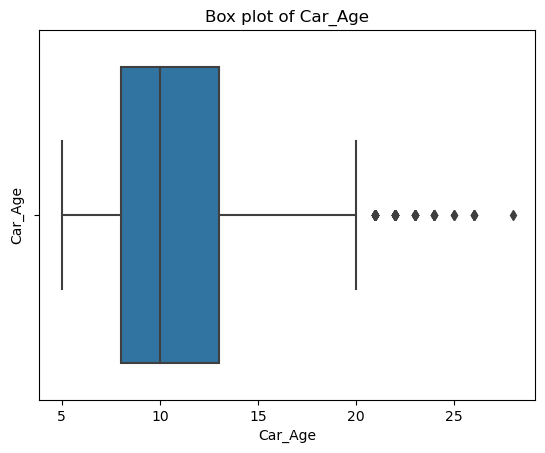

34000.0 73000.0 39000.0
-24500.0 131500.0
171 6500000
171 131500.0
Outliers for Kilometers_Driven: 258


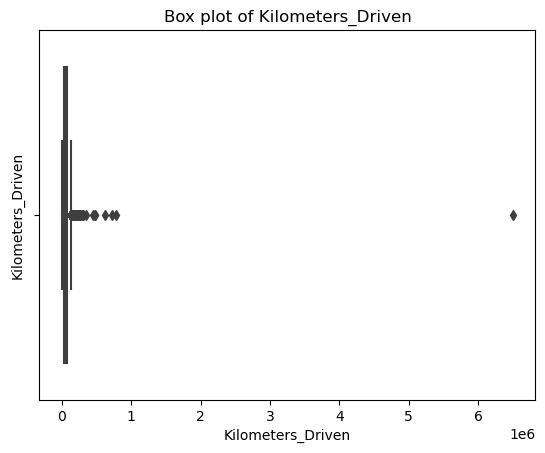

15.0 21.0 6.0
6.0 30.0
0.0 46.955999999999996
6.0 30.0
Outliers for Mileage: 131


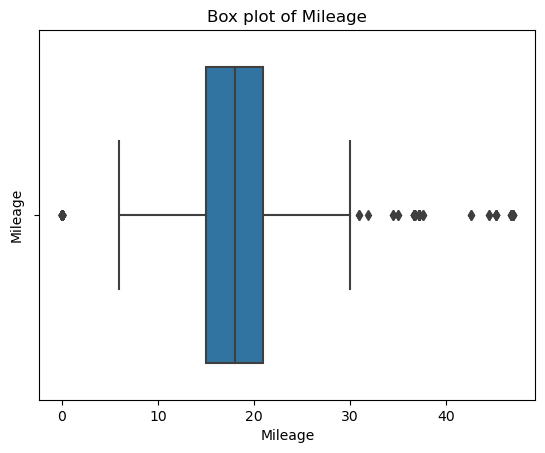

1198.0 1968.0 770.0
43.0 3123.0
72.0 5998.0
72.0 3123.0
Outliers for Engine: 65


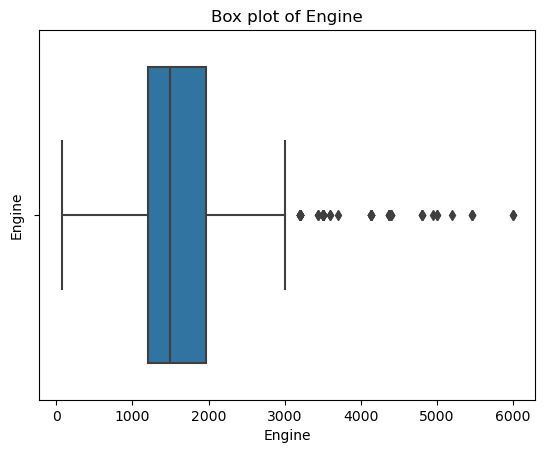

75.0 138.1 63.099999999999994
-19.64999999999999 232.75
34.2 616.0
34.2 232.75
Outliers for Power: 273


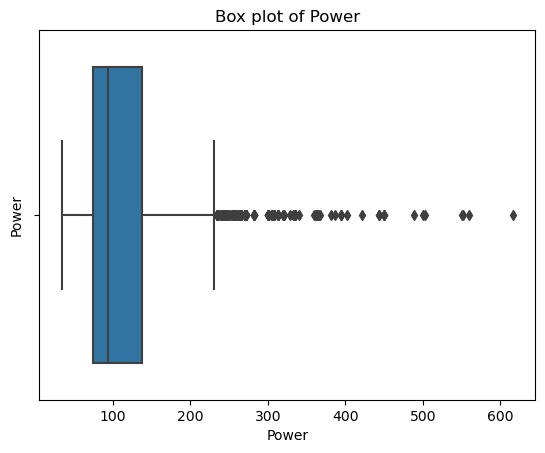

5.0 5.0 0.0
5.0 5.0
0.0 10.0
5.0 5.0
Outliers for Seats: 1153


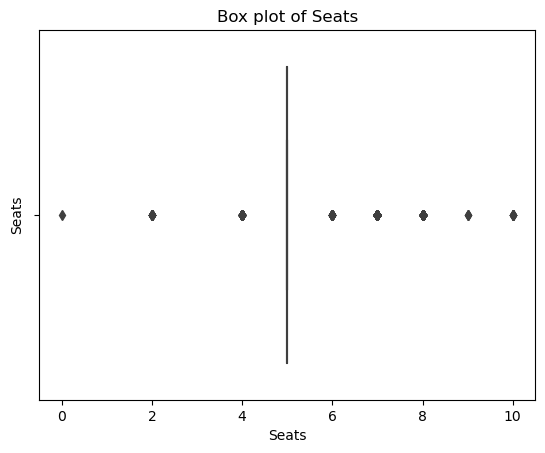

3.5 9.95 6.449999999999999
-6.174999999999999 19.625
0.44 160.0
0.44 19.625
Outliers for Price: 718


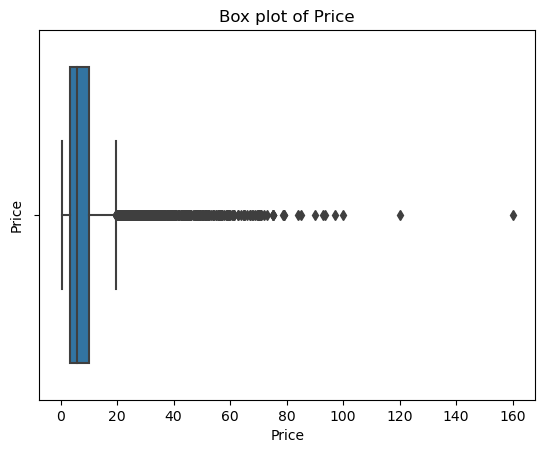

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Columns of interest
columns_of_interest = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Iterate over columns of interest
for column in columns_of_interest:
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    #print(Q1,Q3, IQR)
    
    # Calculate bounds for outliers and printing Them 
    # Printing max and min values of the columns
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #print(lower_bound,upper_bound)
    #print(df[column].min(),df[column].max())
    
    lower = max(lower_bound, df[column].min())
    upper = min(upper_bound, df[column].max())
    #print(lower,upper)
    
    # Find outliers
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    
    # Print outliers
    print(f"Outliers for {column}:", len(outliers))
    # print(outliers)
    
    # Filter data 
    filtered_data = df[(df[column] >= lower) | (df[column] <= upper)]
    
    # Create box plot
    plt.figure()
    sns.boxplot(x = filtered_data[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)
    plt.show()


Calculating the Correlation Between the Specified Columns and Price using Inbuilt method

Correlation between Car_Age & Price :  -0.3053274083613483


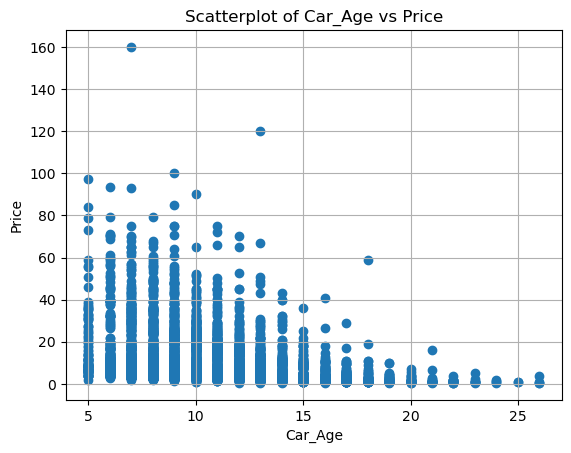

Correlation between Kilometers_Driven & Price :  -0.011492790740116138


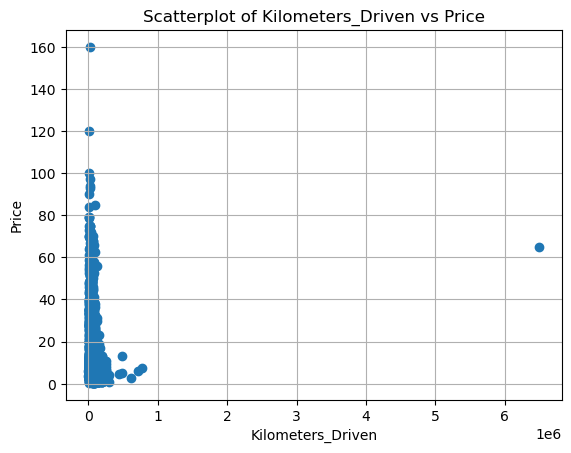

Correlation between Mileage & Price :  -0.2925905807235089


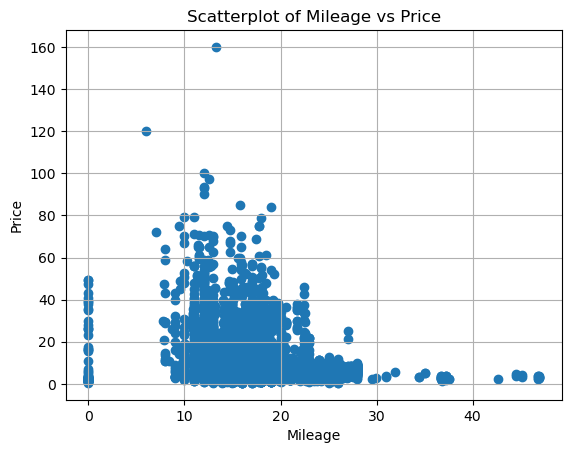

Correlation between Engine & Price :  0.02436256547638226


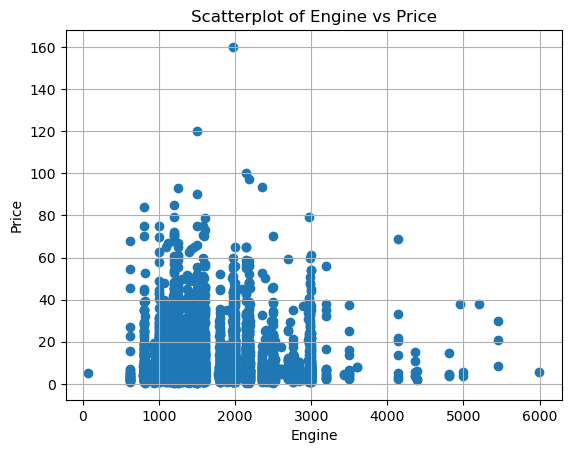

Correlation between Power & Price :  0.7725658004912161


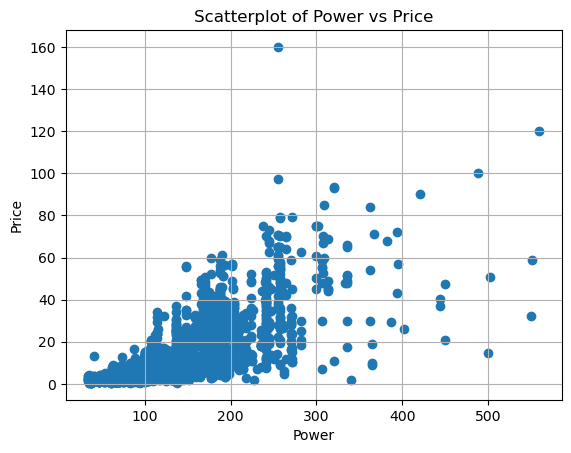

Correlation between Seats & Price :  0.052225447681790195


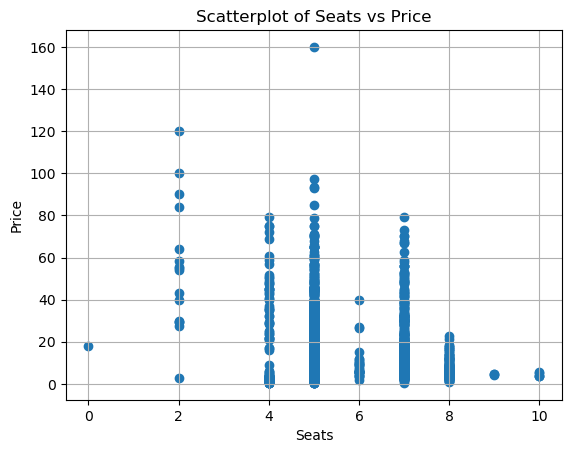

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Seats']

for column in columns:
    # Using in-built Correlation method as the Pearson Coefficient can only be used if there are no null values
    pearson_coef = df[column].corr(df['Price'])
    print(f"Correlation between {column} & Price : ", pearson_coef)
    
    plt.scatter(df[column], df['Price'])
    plt.xlabel(f"{column}")
    plt.ylabel('Price')
    plt.title(f'Scatterplot of {column} vs Price')
    plt.grid(True)
    plt.show()

From the above Box plots and Scatter plot we can say that there are many outliers present in the data along with some missing values so we have to clear those missing values, In order to work on the dataset. From the box plots I can clearly see the average number of kilometer's Driven for a given Car, We can Observe the Number of Seats that are present in most of the Car. From the Scatter Plot we can see where the data lies for a particular Column with respect to Price. We can make some assumptions using this Data.

Question - 3
Finding the Missing Values
For Refernece - https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

In [27]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Car_Age                 0
dtype: int64

In [28]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               164
Engine                150
Power                 383
Seats                   9
New_Price             625
Price                1373
Car_Age                23
dtype: int64

In [29]:
(df.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_Price            86.129877
Price                17.013650
Car_Age               0.000000
dtype: float64

Dropping the "S.No." as it is an Empty column with just Numbers 

In [30]:
df = df.drop(['S.No.'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Car_Age            7253 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


Creating two New Columns "Brand" and "Model" so that we can use Subclass and Fill the Missing values.

In [31]:
df['Brand'] = df.Name.str.split().str.get(0)
df['Model'] = df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)
df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [32]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,NaN,12.50,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,8.61 Lakh,4.50,13,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,NaN,6.00,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,NaN,17.74,11,Audi,A4New


Identifying the Unique Brands in the whole Dataset with its Count

In [33]:
print(df.Brand.unique())
print(df.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


Searching for the data with Similar Names but with Different Representations

In [34]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
df[df.Brand.str.contains('|'.join(searchfor))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.0,2179.0,187.70,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.0,1998.0,112.00,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.0,2179.0,187.70,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.8,1396.0,189.08,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.0,1199.0,134.00,5.0,NaN,NaN,7,ISUZU,D-MAXV-Cross
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.0,1498.0,192.00,5.0,44.59 Lakh,NaN,7,Mini,ClubmanCooper
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.0,1197.0,187.70,5.0,NaN,NaN,9,Land,RoverRange
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.0,2494.0,112.00,5.0,NaN,NaN,11,Mini,CooperCountryman


Replacing all the Similar data with a single attribute to avoid duplication

In [35]:
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

Checking for any Duplication

In [36]:
print(df.Brand.unique())
print(df.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']
32


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.000
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.000
Mileage,7251.0,17.989708,4.848240,0.00,15.0,18.00,21.00,46.956
Engine,7207.0,1616.573470,595.285137,72.00,1198.0,1493.00,1968.00,5998.000
Power,7078.0,112.765214,53.493553,34.20,75.0,94.00,138.10,616.000
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.000
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.000
Car_Age,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.000


Checking all the Missing Values for the Data after addition of two columns

In [38]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

Dropping the Column New_Price as more than 80% of the data is of Null values.

In [39]:
df = df.drop(['New_Price'],axis = 1)
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

In [40]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,17.989708,4.84824,0.0,15.0,18.0,21.0,46.956
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


Copying the Current Data Frame into a New DataFrame called Updated_df to fill the missing values

In [41]:
updated_df = df.copy()
updated_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,12.50,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,4.50,13,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,6.00,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,17.74,11,Audi,A4New


Identifying the Categorical and Numerical Values

In [42]:
cat=updated_df.select_dtypes(include=['object']).columns
num = updated_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat)
print("Numerical Variables:")
print(num)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']


c:\Users\Aravind\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


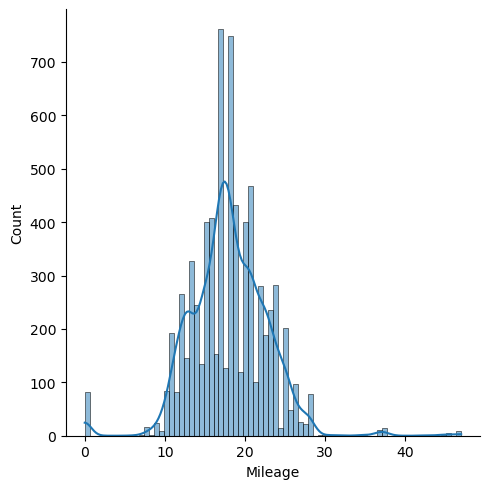

In [43]:
import seaborn as sns

sns.displot(updated_df['Mileage'],kde = True)

As from the above distribution Graph we can Figure out that the data is symmetrical and with little outliers so here we can use "Mean" to Fill out the missing Values

In [44]:
updated_df['Mileage'] = updated_df['Mileage'].fillna(updated_df.groupby('Brand')['Mileage'].transform(lambda x: x.fillna(x.mean())))

updated_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

c:\Users\Aravind\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


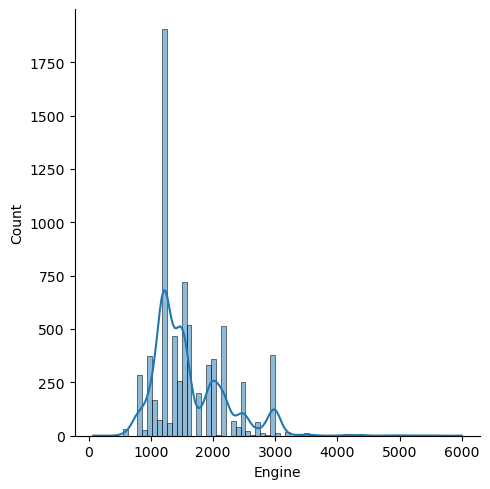

In [45]:
import seaborn as sns

sns.displot(updated_df['Engine'],kde = True)

Now From the above distribution Graph we can understand that the data is Positively Skewed and it also contains outliers so with help of "Median" we can handle the Missing values

In [46]:
updated_df['Engine'] = updated_df['Engine'].fillna(updated_df.groupby('Model')['Engine'].transform(lambda x: x.fillna(x.median())))
updated_df['Engine'] = updated_df['Engine'].fillna(updated_df.groupby('Brand')['Engine'].transform(lambda x: x.fillna(x.median())))
updated_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                 175
Seats                  53
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

c:\Users\Aravind\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


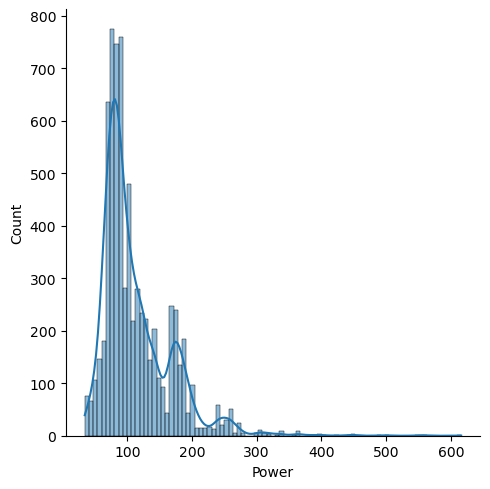

In [47]:
sns.displot(updated_df['Power'],kde = True)

According the above Distribution the Graph is positively Skewed and there are outliers present in the column so we can remove them using "Median", Here we have used three groupby categories to completely fill the values

In [48]:
updated_df['Power'] = updated_df['Power'].fillna(updated_df.groupby('Model')['Power'].transform(lambda x: x.fillna(x.median())))
updated_df['Power'] = updated_df['Power'].fillna(updated_df.groupby('Brand')['Power'].transform(lambda x: x.fillna(x.median())))
updated_df['Power'] = updated_df['Power'].fillna(updated_df.groupby('Mileage')['Power'].transform(lambda x: x.fillna(x.median())))
updated_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  53
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

c:\Users\Aravind\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


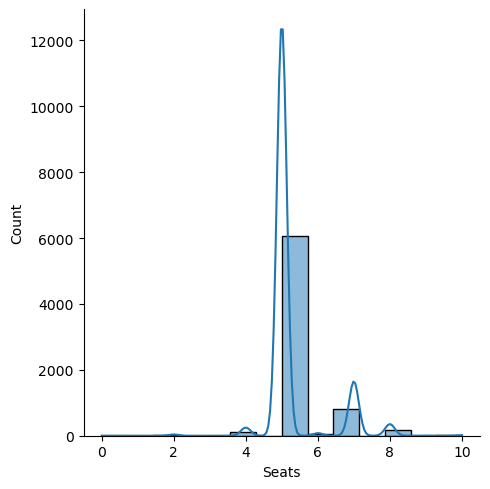

In [49]:
sns.displot(updated_df['Seats'],kde = True)

From the above Distribution we can say that the Seats form Symmetric of data and the Seats are mostly around 4 to 8 so here I have used "Mode" To easily fill the Missing values

In [54]:
updated_df['Seats'] = updated_df['Seats'].fillna(updated_df.groupby('Brand')['Seats'].transform(lambda x: x.fillna(x.mode()[0])))
updated_df.isnull().sum()


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

c:\Users\Aravind\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


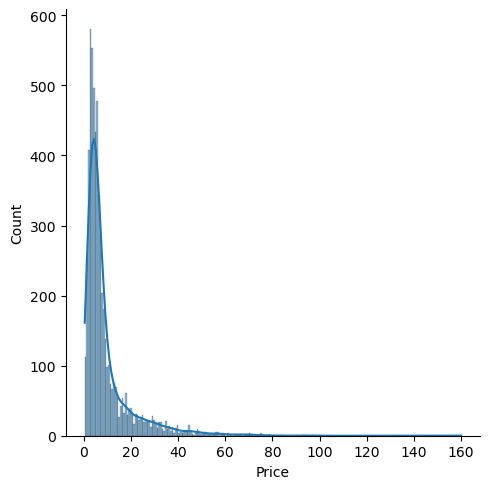

In [55]:
sns.displot(updated_df['Price'],kde = True)

From the above Distribution we can see that the data is positively skewed data and there are many outliers present in the data so we can use the Model, Brand, Seats columns to Fill out the missing values

In [56]:
updated_df['Price'] = updated_df['Price'].fillna(updated_df.groupby('Model')['Price'].transform(lambda x: x.fillna(x.median())))
updated_df['Price'] = updated_df['Price'].fillna(updated_df.groupby('Brand')['Price'].transform(lambda x: x.fillna(x.median())))
updated_df['Price'] = updated_df['Price'].fillna(updated_df.groupby('Seats')['Price'].transform(lambda x: x.fillna(x.median())))

updated_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Brand                0
Model                1
dtype: int64

QUESTION - 4
Comparing the Box Plots with The Original Values and the Imputed Values

Intial Value
Outliers for Car_Age:


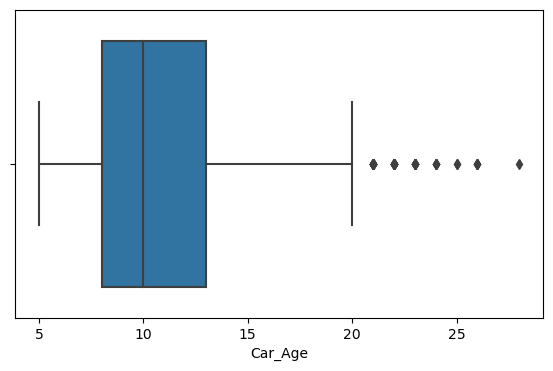

Updated Values:  
Outliers for Car_Age:


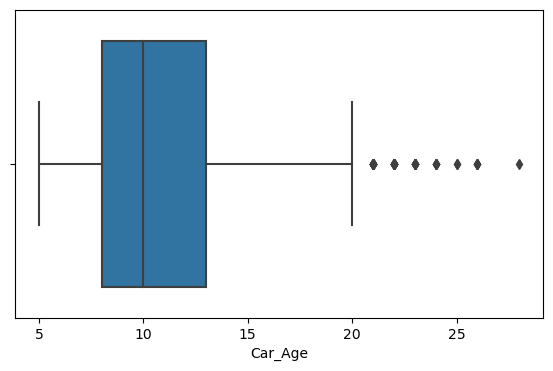

Intial Value
Outliers for Kilometers_Driven:


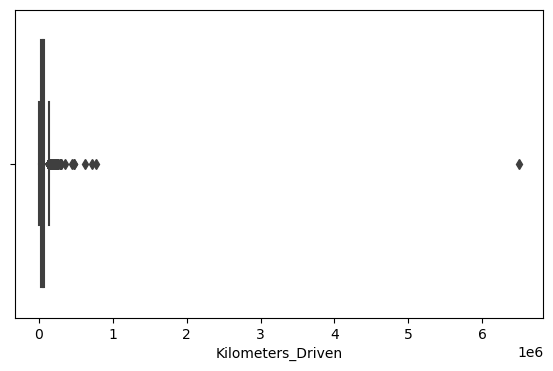

Updated Values:  
Outliers for Kilometers_Driven:


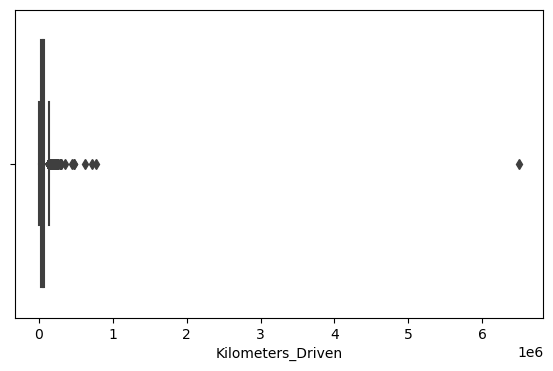

Intial Value
Outliers for Mileage:


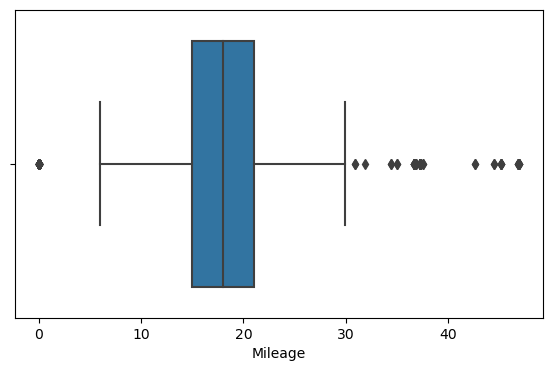

Updated Values:  
Outliers for Mileage:


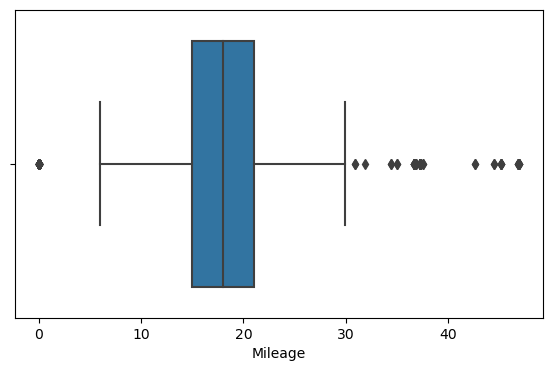

Intial Value
Outliers for Engine:


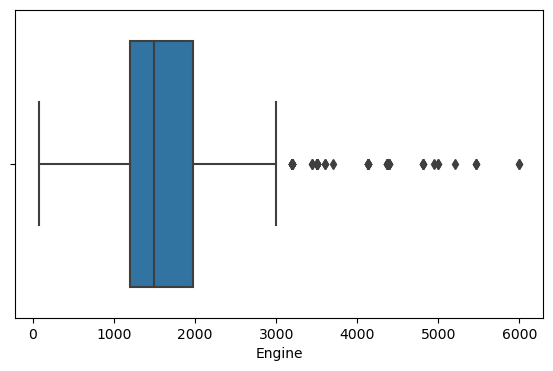

Updated Values:  
Outliers for Engine:


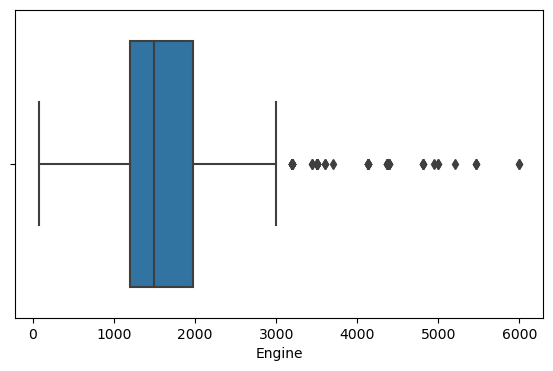

Intial Value
Outliers for Power:


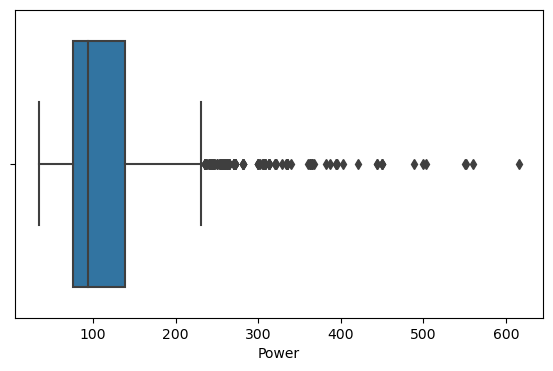

Updated Values:  
Outliers for Power:


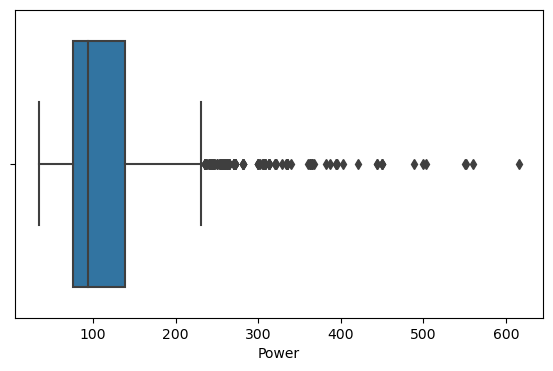

Intial Value
Outliers for Seats:


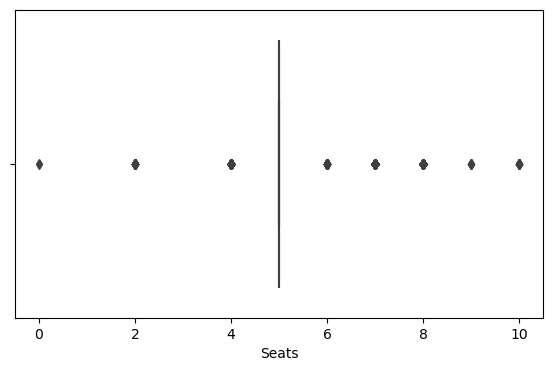

Updated Values:  
Outliers for Seats:


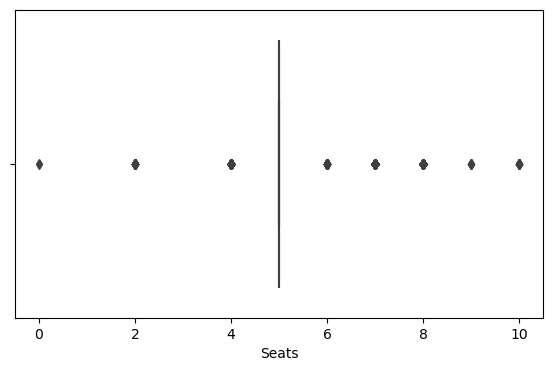

Intial Value
Outliers for Price:


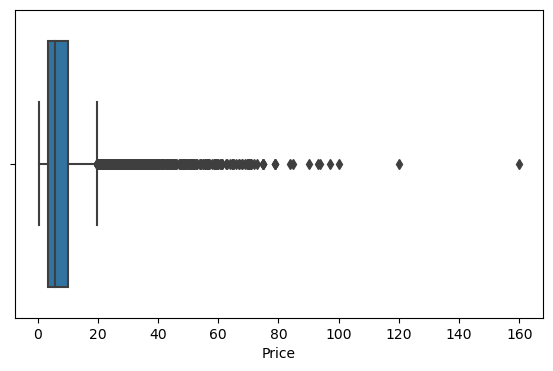

Updated Values:  
Outliers for Price:


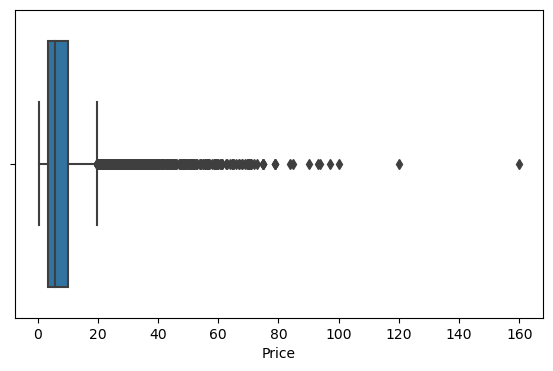

In [58]:

columns_of_interest = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Iterate over columns of interest
for column in columns_of_interest:
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate bounds for outliers and printing Them 
    # Printing max and min values of the columns
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Intial Value")
    #print(lower_bound,upper_bound)
    #print(df[column].min(),df[column].max())
    
    lower = max(lower_bound, df[column].min())
    upper = min(upper_bound, df[column].max())
    #print(lower,upper)
    
    # Find outliers
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    
    # Print outliers
    #print(f"Outliers for {column}:",len(outliers))
    #print(outliers)
    
    # Filter data 
    filtered_data = df[(df[column] >= lower) | (df[column] <= upper)]
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.boxplot(x = filtered_data[column])
    plt.show()
    
    # Calculate quartiles
    q1 = updated_df[column].quantile(0.25)
    q3 = updated_df[column].quantile(0.75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate bounds for outliers and printing Them 
    # Printing max and min values of the columns
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    print("Updated Values:  ")
    #print(lower_limit,upper_limit)
    #print(updated_df[column].min(),updated_df[column].max())
    
    Lower_1 = max(lower_limit, updated_df[column].min())
    Upper_1 = min(upper_limit, updated_df[column].max())
    #print(Lower_1,Upper_1)
    
    # Find outliers
    outliers_1 = updated_df[(updated_df[column] < Lower_1) | (updated_df[column] > Upper_1)]
    
    # Print outliers
    #print(f"Outliers for {column}:",len(outliers_1))
    #print(outliers_1)
    
    # Filter data 
    filtered_data_updated = df[(df[column] >= Lower_1) | (df[column] <= Upper_1)]
    
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,2)
    sns.boxplot(x = filtered_data_updated[column])
    plt.show()
    




Comparing the Scatter Plots for the Original as well as the Imputed Data Points with Different Colour

Correlation between Car_Age & Price :  -0.3053274083613483
Pearson Coefficient between Car_Age & Price :  -0.28849135324146163


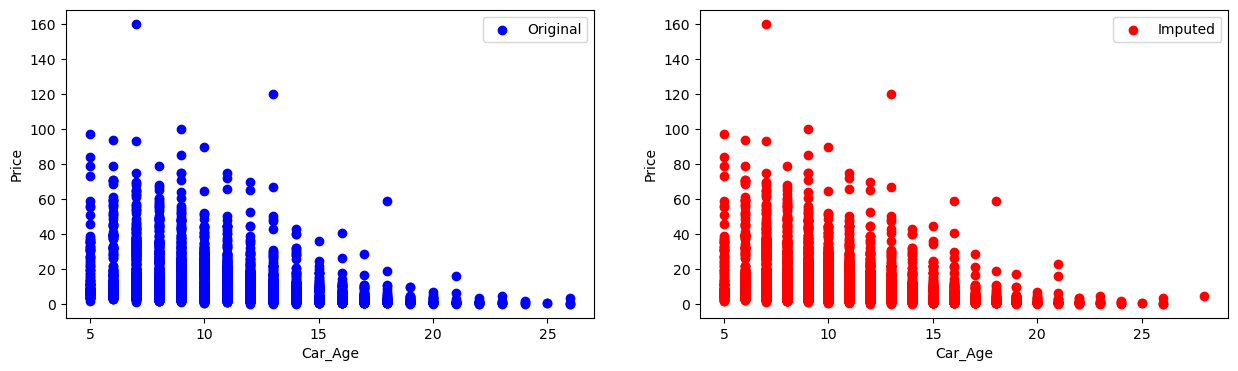

Correlation between Kilometers_Driven & Price :  -0.011492790740116138
Pearson Coefficient between Kilometers_Driven & Price :  -0.015771612522152954


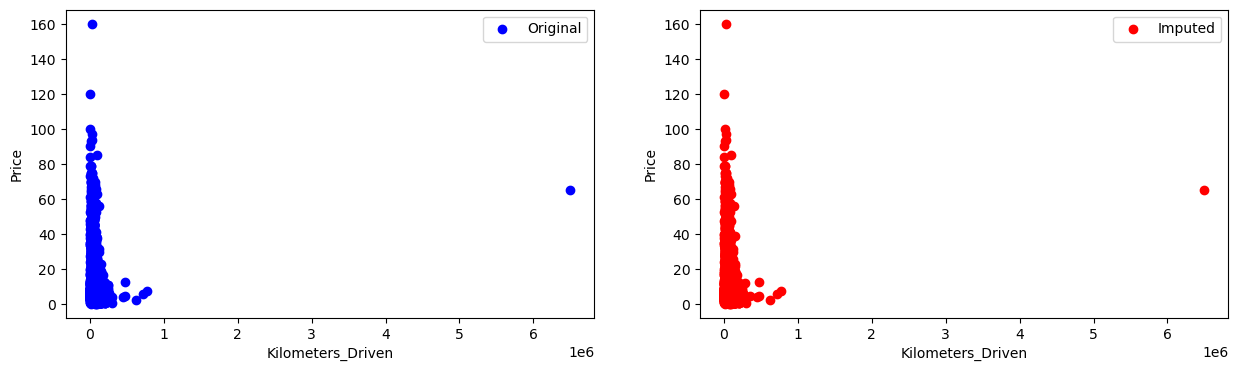

Correlation between Mileage & Price :  -0.2925905807235089
Pearson Coefficient between Mileage & Price :  -0.29447976906818685


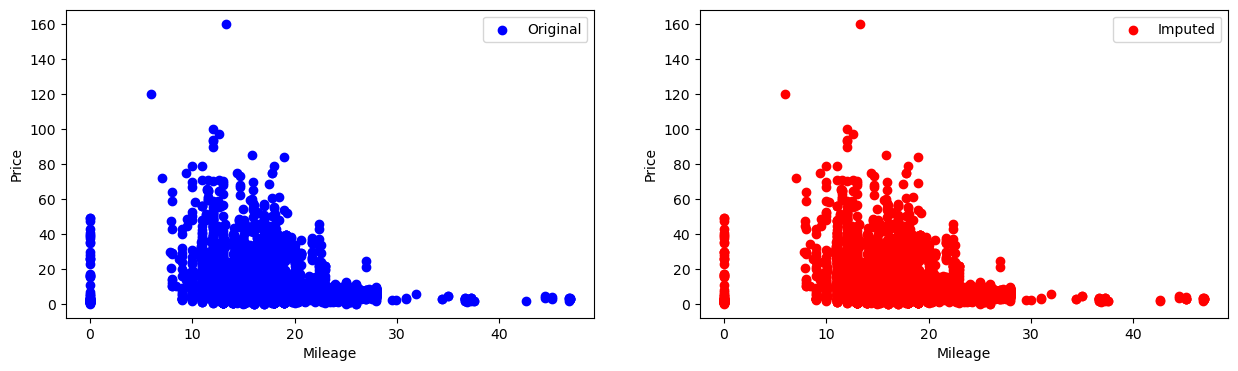

Correlation between Engine & Price :  0.02436256547638226
Pearson Coefficient between Engine & Price :  0.0223423855439085


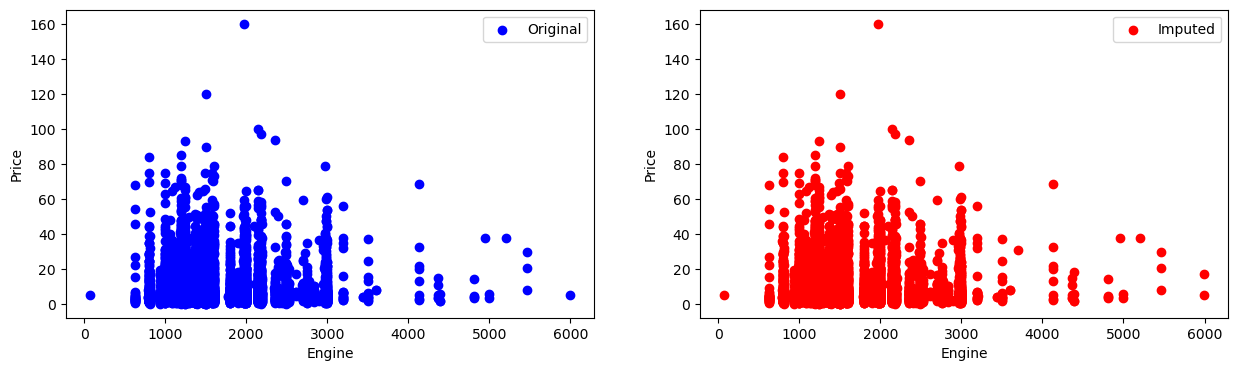

Correlation between Power & Price :  0.7725658004912161
Pearson Coefficient between Power & Price :  0.7778422189300833


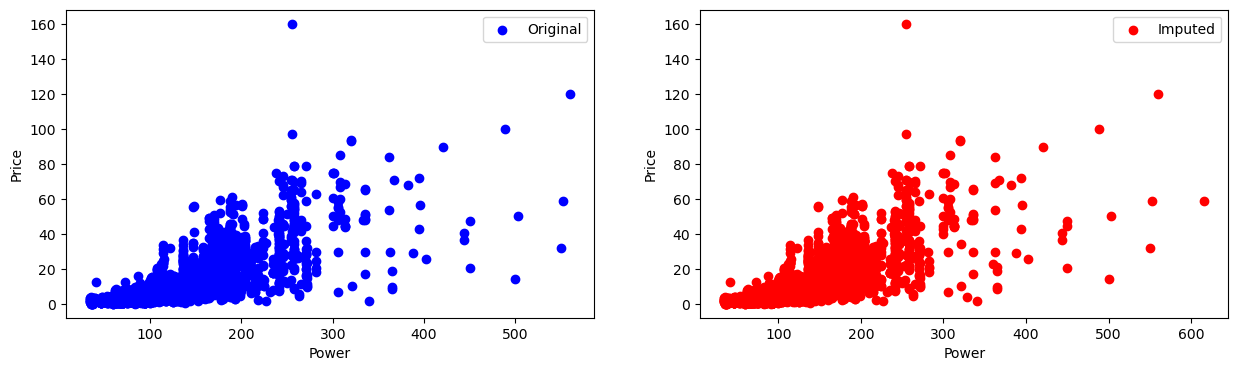

Correlation between Seats & Price :  0.052225447681790195
Pearson Coefficient between Seats & Price :  0.05247755646308159


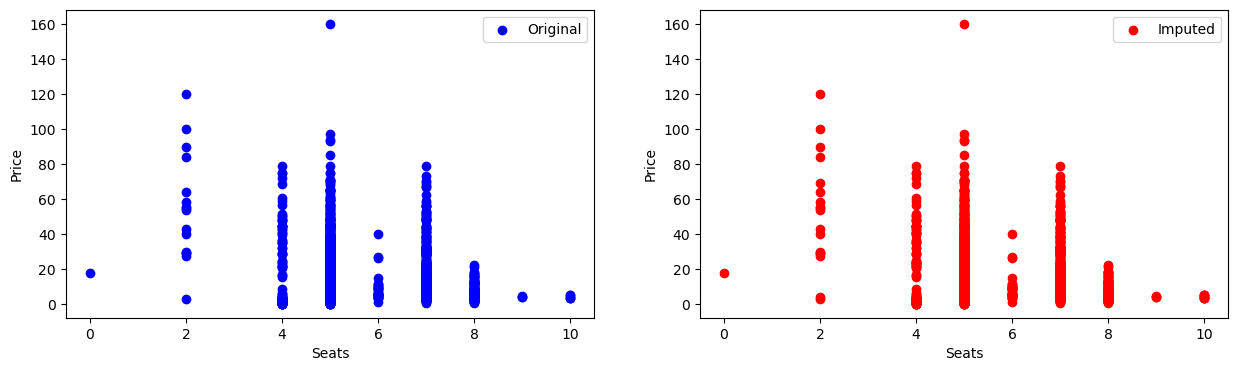

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

original_df = df
imputed_df = updated_df


columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Seats']

for column in columns:
    pearson_coef = original_df[column].corr(original_df['Price'])
    print(f"Correlation between {column} & Price : ", pearson_coef)
    corr,_= pearsonr(imputed_df[column], imputed_df['Price'])
    print(f"Pearson Coefficient between {column} & Price : ", corr)
    

    
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
     
    # Plot original data
    plt.scatter(original_df[column], original_df['Price'], color='blue', label='Original')
    plt.xlabel(f"{column}")
    plt.ylabel('Price')
    plt.legend()
    
    plt.subplot(1,2,2)
    
    # Plot imputed data
    plt.scatter(imputed_df[column], imputed_df['Price'], color='red', label='Imputed')
    
    # Add labels and legend
    plt.xlabel(f"{column}")
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()


From the Graphs we can observe that the original and the imputed graphs are a lot similar and the there is a slight change in the data points in the imputed graphs because of the missing values that are been filled also the the correlation and the correlation coefiicient looks a lot close.